In [2]:
from GCH_block import GCH
from utils.preprocessing import read_turbine_positions
import matplotlib.pyplot as plt
import numpy as np
from experiments.LESReinforcement.env import create_env
from stable_baselines3 import PPO

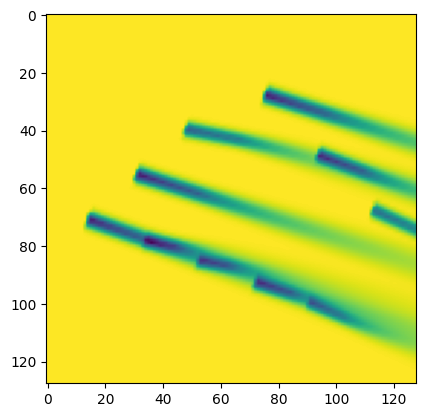

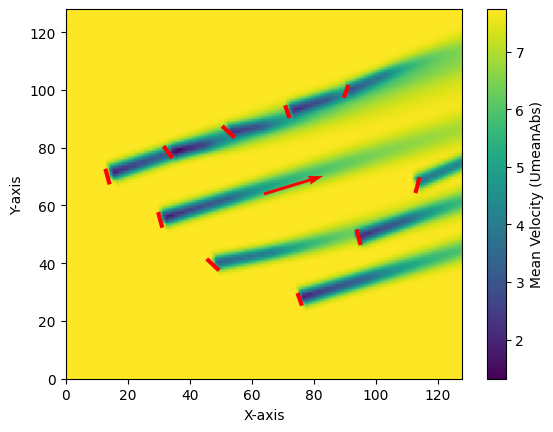

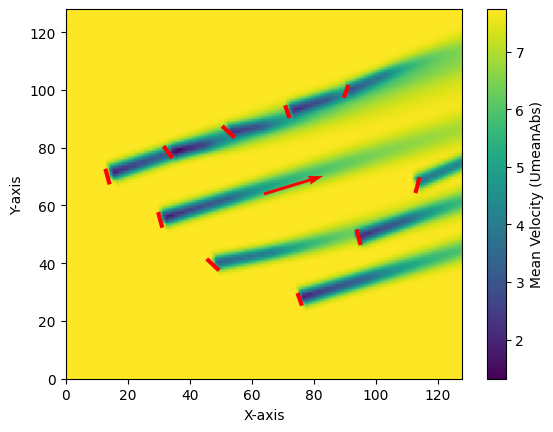

In [65]:
env = create_env()
model = PPO.load("TurbineEnvModel")

obs, info = env.reset()
action, _states = model.predict(obs)
obs, rewards, dones, truncations, info = env.step(action)
env.render()

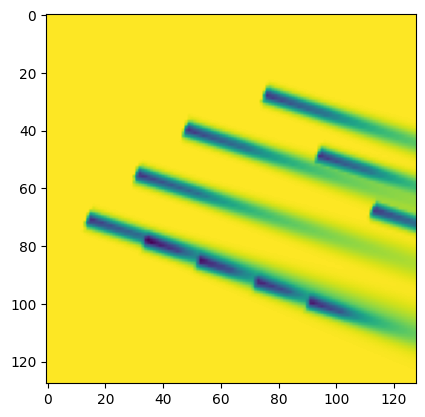

In [66]:
yaw_angles = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
wind_dir = 270-obs['wind_direction'][0]

fmodel = GCH(x_resolution=128, 
             y_resolution=128,
             x_bounds=(0,5000),
             y_bounds=(0,5000),
             x_size=128,
             y_size=128,
             height=90)

grid,power_no_wakesteering = fmodel(x_coordinates_turbines =  x_cor,
                y_coordinates_turbines = y_cor,
                wind_directions = [wind_dir],
                wind_speeds = [8],
                yaw_angles = yaw_angles,
                return_map = True)



In [68]:
print("Power without wake steering",np.round(power_no_wakesteering/1000) , "GW")
print("Power with wake steering", np.round(rewards/1000), "GW")

Power without wake steering 30543.0 GW
Power with wake steering 28628.0 GW
